# flat10 processing

This notebook should probably be split as it does too many things right now. Currently, it:

- makes quick plots of temperature and atmospheric CO$_2$ concentration evolution
- calculates airborne fraction
- plots it
- calculates the flat10 metrics
- plots them

The code is also overly repetitive and should be refactored, but that's a job for another day.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scmdata.database
import seaborn as sns
import tqdm.autonotebook as tqdman
from scmdata.units import UNIT_REGISTRY as ur

import utils

/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/database/_database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

## Specify where to save output data

In [4]:
OUTPUT_DIR = os.path.join(
    utils.DATA_DIR, "processed", "flat10-output_2023_10_24_153028"
)

<IPython.core.display.Javascript object>

In [5]:
OUT_FILE = os.path.join(OUTPUT_DIR, f"046_{OUTPUT_DIR.split(os.sep)[-1]}_crunched.csv")
OUT_FILE

'/Users/znicholls/Documents/AGCEC/MCastle/magicc7-openscmrunner/notebooks/020-process-output/../../data/processed/flat10-output_2023_10_24_153028/046_flat10-output_2023_10_24_153028_crunched.csv'

<IPython.core.display.Javascript object>

## Load data

In [6]:
IN_FILE = os.path.join(OUTPUT_DIR, f"045_{OUTPUT_DIR.split(os.sep)[-1]}_timeseries.nc")
IN_FILE_EMISSIONS = os.path.join(OUTPUT_DIR, f"015_input-emissions.csv")

<IPython.core.display.Javascript object>

In [7]:
raw_data = scmdata.ScmRun.from_nc(IN_FILE)
raw_data

<ScmRun (timeseries: 3600, timepoints: 316)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2165-01-01T00:00:00
Meta:
	     climate_model ensemble_member      model region    scenario unit  \
	0     MAGICCv7.5.3               0  idealised  World      flat10  ppm   
	1     MAGICCv7.5.3               0  idealised  World      flat10    K   
	2     MAGICCv7.5.3               1  idealised  World      flat10  ppm   
	3     MAGICCv7.5.3               1  idealised  World      flat10    K   
	4     MAGICCv7.5.3              10  idealised  World      flat10  ppm   
	...            ...             ...        ...    ...         ...  ...   
	3595  MAGICCv7.5.3              97  idealised  World  flat10_zec    K   
	3596  MAGICCv7.5.3              98  idealised  World  flat10_zec  ppm   
	3597  MAGICCv7.5.3              98  idealised  World  flat10_zec    K   
	3598  MAGICCv7.5.3              99  idealised  World  flat10_zec  ppm   
	3599  MAGICCv7.5.3              99  idealised  World  flat10_zec    K   
	

<IPython.core.display.Javascript object>

In [8]:
input_emissions = scmdata.ScmRun(IN_FILE_EMISSIONS)
input_emissions

<ScmRun (timeseries: 6, timepoints: 320)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2169-01-01T00:00:00
Meta:
	       model region    scenario      unit  \
	0  idealised  World      flat10  PgC / yr   
	1  idealised  World      flat10  PgC / yr   
	2  idealised  World  flat10_zec  PgC / yr   
	3  idealised  World  flat10_zec  PgC / yr   
	4  idealised  World  flat10_cdr  PgC / yr   
	5  idealised  World  flat10_cdr  PgC / yr   
	
	                                     variable  
	0  Emissions|CO2|MAGICC Fossil and Industrial  
	1                  Emissions|CO2|MAGICC AFOLU  
	2  Emissions|CO2|MAGICC Fossil and Industrial  
	3                  Emissions|CO2|MAGICC AFOLU  
	4  Emissions|CO2|MAGICC Fossil and Industrial  
	5                  Emissions|CO2|MAGICC AFOLU  

<IPython.core.display.Javascript object>

## Quick plots

/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

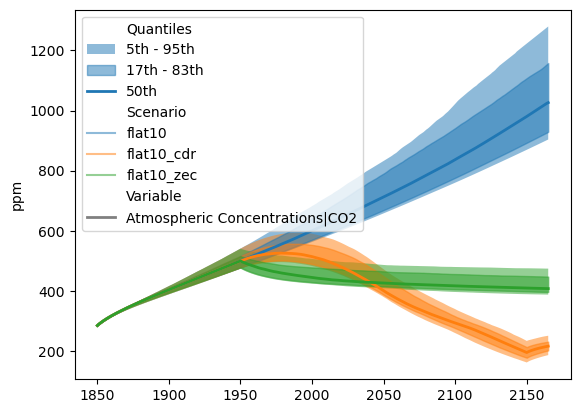

/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

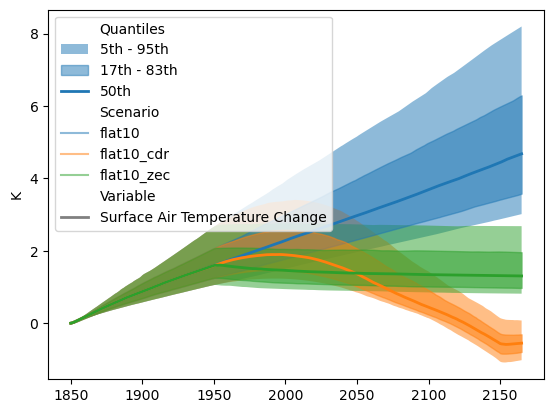

<IPython.core.display.Javascript object>

In [9]:
for vdf in raw_data.groupby("variable"):
    vdf.plumeplot(
        time_axis="year",
        quantiles_plumes=(((0.05, 0.95), 0.5), ((0.17, 0.83), 0.5), ((0.5,), 1.0)),
    )
    plt.show()

/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/plotting.py:81: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)


<Axes: xlabel='time', ylabel='PgC / yr'>

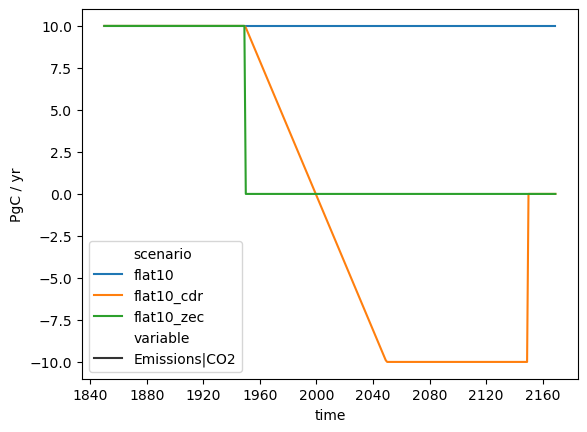

<IPython.core.display.Javascript object>

In [10]:
total_co2_emissions = input_emissions.process_over("variable", "sum", as_run=True, op_cols={"variable": "Emissions|CO2"})
total_co2_emissions.lineplot(style="variable")

## Calculate airborne fraction

$$
AF = \frac{\Delta C}{B}
$$

In [11]:
start_year = raw_data.time_points.years()[0]
start_year

1850

<IPython.core.display.Javascript object>

In [12]:
GTC_PER_PPM = ur.Quantity(2.12, "GtC / ppm")

<IPython.core.display.Javascript object>

In [13]:
change_in_atmos_co2 = (
    raw_data
    .filter(variable="Atmospheric Concentrations|CO2")
    .relative_to_ref_period_mean(year=[start_year])
) * GTC_PER_PPM
change_in_atmos_co2_ts = change_in_atmos_co2.timeseries(time_axis="year")
change_in_atmos_co2_ts

time                                                                                                                                                   1850  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario   unit   variable                               
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2   0.0   
              1               idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2   0.0   
              10              idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2   0.0   
              100             idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2   0.0   
              101             idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2   0.0   
...                                                                                                                                                     ...   
              95              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentrations|CO2   0.0   
              96              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentrations|CO2   0.0   
              97              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentrations|CO2   0.0   
              98              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentrations|CO2   0.0   
              99              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentrations|CO2   0.0   

time                                                                                                                                                       1851  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario   unit   variable                                   
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2  9.519469   
              1               idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2  9.533708   
              10              idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2  9.519469   
              100             idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2  9.519469   
              101             idealised 1850                      1850                        World  flat10     gigatC Atmospheric Concentrations|CO2  9.549334   
...                                                                                                                                                         ...   
              95              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentrations|CO2  9.519469   
              96              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentrations|CO2  9.525520   
              97              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentrations|CO2  9.519469   
              98              idealised 1850                      1850                        World  flat10_zec gigatC Atmospheric Concentr

<IPython.core.display.Javascript object>

/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/plotting.py:81: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)


time                                                                                                                                           1850-01-01  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario unit   variable                               
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        10.0   
              1               idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        10.0   
              10              idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        10.0   
              100             idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        10.0   
              101             idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        10.0   

time                                                                                                                                           1851-01-01  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario unit   variable                               
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        20.0   
              1               idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        20.0   
              10              idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        20.0   
              100             idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        20.0   
              101             idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        20.0   

time                                                                                                                                           1852-01-01  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario unit   variable                               
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        30.0   
              1               idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        30.0   
              10              idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        30.0   
              100             idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        30.0   
              101             idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        30.0   

time                                                                                                                                           1853-01-01  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario unit   variable                               
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        40.0   
              1               idealised 1850                      1850                        World  flat10   petagC Cumulative Emissions|CO2        40.0   
              10              idealised 1850                      1850  

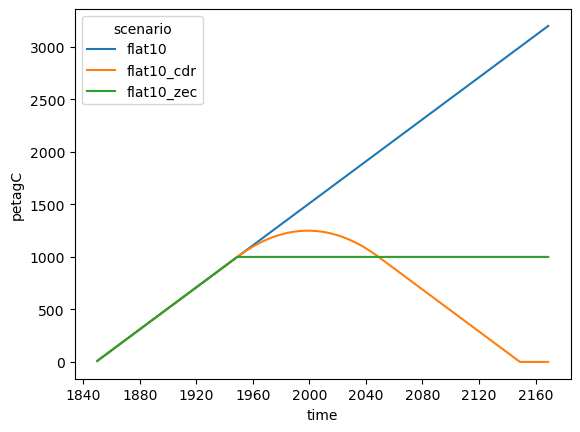

<IPython.core.display.Javascript object>

In [17]:
non_align_index_cols = ["variable", "unit"]
cumulative_emissions = total_co2_emissions.cumsum()
cumulative_emissions.lineplot()
cumulative_emissions_ts = cumulative_emissions.timeseries(time_axis="year")
cumulative_emissions_ts = (
    cumulative_emissions_ts
    .align(change_in_atmos_co2_ts.reset_index(non_align_index_cols, drop=True), axis="rows", join="inner")
)[0]
cumulative_emissions_aligned = scmdata.ScmRun(cumulative_emissions_ts)
cumulative_emissions_aligned.head()

In [15]:
airborne_fraction = (
    change_in_atmos_co2
    .divide(cumulative_emissions_aligned, op_cols={"variable": "Airborne Fraction"})
    .convert_unit("dimensionless")
)
airborne_fraction.head()

time                                                                                                                                           1850-01-01  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario unit          variable                        
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction         0.0   
              1               idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction         0.0   
              10              idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction         0.0   
              100             idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction         0.0   
              101             idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction         0.0   

time                                                                                                                                           1851-01-01  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario unit          variable                        
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.475973   
              1               idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.476685   
              10              idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.475973   
              100             idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.475973   
              101             idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.477467   

time                                                                                                                                           1852-01-01  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario unit          variable                        
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.570519   
              1               idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.564534   
              10              idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.581234   
              100             idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.561788   
              101             idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.590266   

time                                                                                                                                           1853-01-01  \
climate_model ensemble_member model     reference_period_end_year reference_period_start_year region scenario unit          variable                        
MAGICCv7.5.3  0               idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.610313   
              1               idealised 1850                      1850                        World  flat10   dimensionless Airborne Fraction    0.607358   
              10              idealised 1850                      1850  

<IPython.core.display.Javascript object>

/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/znicholls/mambaforge/envs/magicc7-openscmrunner/lib/python3.9/site-packages/scmdata/run.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

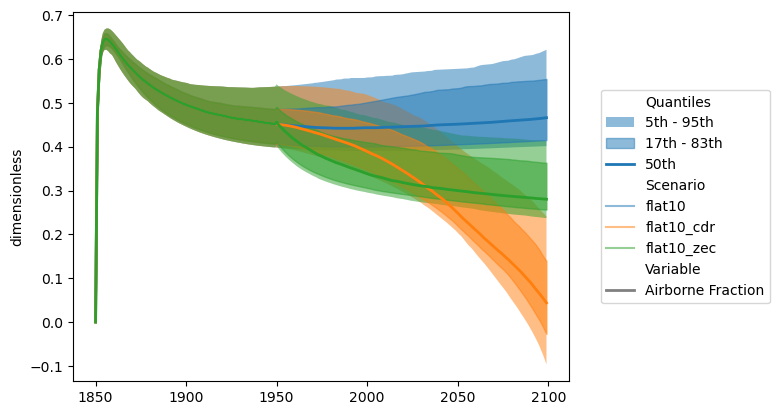

<IPython.core.display.Javascript object>

In [19]:
ax, lh = (
    airborne_fraction
    .filter(year=range(start_year, start_year + 250))
    .plumeplot(
        time_axis="year",
        quantiles_plumes=(((0.05, 0.95), 0.5), ((0.17, 0.83), 0.5), ((0.5,), 1.0)),
    )
)
ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), handles=lh)

## TCRE

In [21]:
temperatures = raw_data.filter(variable="Surface Air Temperature Change")

<IPython.core.display.Javascript object>

<Axes: >

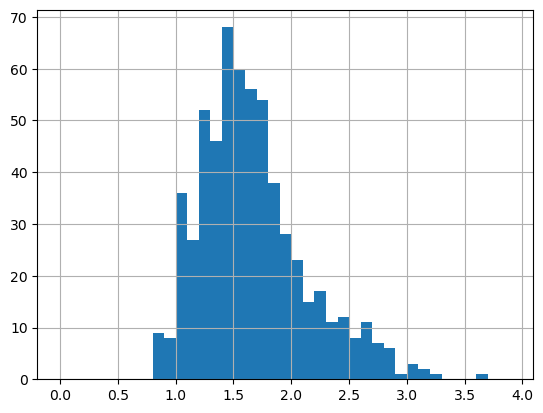

<IPython.core.display.Javascript object>

In [22]:
tcre_flat10 = (
    temperatures
    .filter(
        year=range(start_year + 90, start_year + 109 + 1), 
        scenario="flat10",
    )
    .timeseries()
    .mean(axis="columns")
)
tcre_flat10.name = "TCRE_flat10"
tcre_flat10.hist(bins=np.arange(0, 4, 0.1))

## ZEC

In [23]:
def set_scenario_value(inp: pd.Series, value: str) -> pd.Series:
    out = inp.copy()
    out.index = out.index.set_levels([value], level="scenario")

    return out

<IPython.core.display.Javascript object>

ZEC50_flat10  \
climate_model ensemble_member model     region scenario unit variable                                       
MAGICCv7.5.3  0               idealised World  ZEC_runs K    Surface Air Temperature Change     -0.055070   
              1               idealised World  ZEC_runs K    Surface Air Temperature Change      0.480832   
              10              idealised World  ZEC_runs K    Surface Air Temperature Change     -0.134819   
              100             idealised World  ZEC_runs K    Surface Air Temperature Change     -0.033854   
              101             idealised World  ZEC_runs K    Surface Air Temperature Change     -0.122979   
...                                                                                                   ...   
              95              idealised World  ZEC_runs K    Surface Air Temperature Change     -0.186408   
              96              idealised World  ZEC_runs K    Surface Air Temperature Change     -0.107948   
              97              idealised World  ZEC_runs K    Surface Air Temperature Change     -0.106468   
              98              idealised World  ZEC_runs K    Surface Air Temperature Change     -0.110825   
              99              idealised World  ZEC_runs K    Surface Air Temperature Change      0.002144   

                                                                                             ZEC100_flat10  \
climate_model ensemble_member model     region scenario unit variable                                        
MAGICCv7.5.3  0               idealised World  ZEC_runs K    Surface Air Temperature Change      -0.068159   
              1               idealised World  ZEC_runs K    Surface Air Temperature Change       0.552105   
              10              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.260349   
              100             idealised World  ZEC_runs K    Surface Air Temperature Change      -0.069163   
              101             idealised World  ZEC_runs K    Surface Air Temperature Change      -0.172242   
...                                                                                                    ...   
              95              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.250674   
              96              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.134690   
              97              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.140437   
              98              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.161108   
              99              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.017678   

                                                                                             ZEC200_flat10  
climate_model ensemble_member model     region scenario unit variable                                       
MAGICCv7.5.3  0               idealised World  ZEC_runs K    Surface Air Temperature Change      -0.058171  
              1               idealised World  ZEC_runs K    Surface Air Temperature Change       0.545572  
              10              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.388565  
              100             idealised World  ZEC_runs K    Surface Air Temperature Change      -0.112463  
              101             idealised World  ZEC_runs K    Surface Air Temperature Change      -0.245566  
...                                                                                                    ...  
              95              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.332439  
              96              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.174522  
              97              idealised World  ZEC_runs K    Surface Air Temperature Change      -0.190303  
              98              idealised World

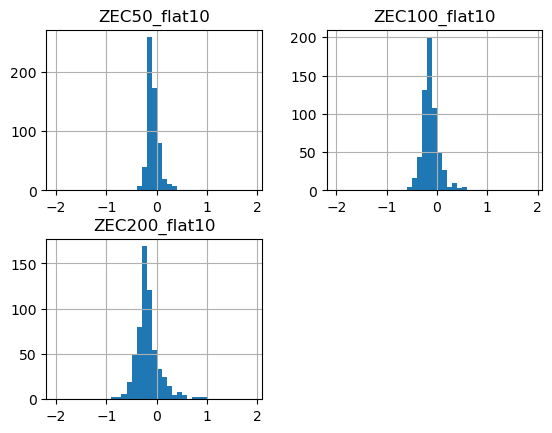

<IPython.core.display.Javascript object>

In [24]:
zec_ts = (
    temperatures
    .filter(scenario="flat10_zec")
    .timeseries(time_axis="year")
)

zec_flat10 = []
for name, years in (
    ("ZEC50", range(start_year + 150 - 10, start_year + 150 + 9 + 1)),
    ("ZEC100", range(start_year + 200 - 10, start_year + 200 + 9 + 1)),
    ("ZEC200", range(start_year + 300 - 10, start_year + 300 + 9 + 1)),
):
    zec_flat10_zec_mean = set_scenario_value(zec_ts[years].mean(axis="columns"), "ZEC_runs")
    tcre_flat10_comp = set_scenario_value(tcre_flat10, "ZEC_runs")
    
    zec_v = zec_flat10_zec_mean - tcre_flat10_comp
    zec_v.name = f"{name}_flat10"
    zec_v = zec_v.to_frame()

    zec_flat10.append(zec_v)

zec_flat10 = pd.concat(zec_flat10, axis="columns")
zec_flat10.hist(bins=np.arange(-2, 2, 0.1))
zec_flat10

## TNZ

<Axes: >

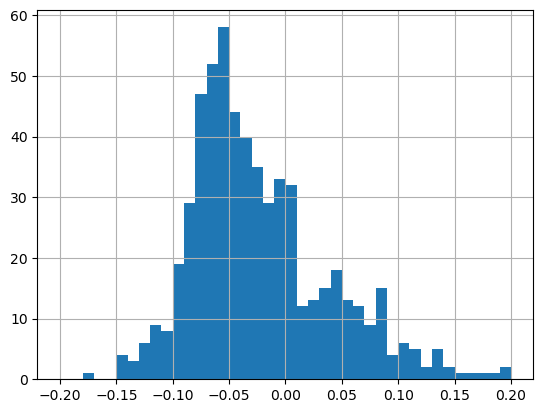

<IPython.core.display.Javascript object>

In [25]:
base = (
    temperatures
    .filter(
        scenario="flat10_cdr",
        year=range(start_year + 150 - 10, start_year + 150 + 9 + 1),
    )
    .timeseries(time_axis="year")
    .mean(axis="columns")
)

other = (
    temperatures
    .filter(
        scenario="flat10",
        year=range(start_year + 125 - 10, start_year + 125 + 9 + 1),
    )
    .timeseries(time_axis="year")
    .mean(axis="columns")
)

tnz = set_scenario_value(base, "TNZ_runs") - set_scenario_value(other, "TNZ_runs")
tnz.name = "TNZ_flat10"
tnz.hist(bins=np.arange(-0.2, 0.21, 0.01))

## TR1000

<Axes: >

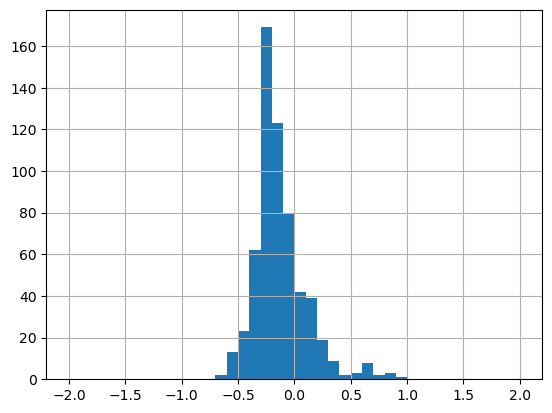

<IPython.core.display.Javascript object>

In [26]:
base = (
    temperatures
    .filter(
        scenario="flat10_cdr",
        year=range(start_year + 200 - 10, start_year + 200 + 9 + 1),
    )
    .timeseries(time_axis="year")
    .mean(axis="columns")
)

other = (
    temperatures
    .filter(
        scenario="flat10",
        year=range(start_year + 100 - 10, start_year + 100 + 9 + 1),
    )
    .timeseries(time_axis="year")
    .mean(axis="columns")
)

tr1000 = set_scenario_value(base, "TR1000_runs") - set_scenario_value(other, "TR1000_runs")
tr1000.name = "TR1000_flat10"
tr1000.hist(bins=np.arange(-2, 2.1, 0.1))

## TR0

<Axes: >

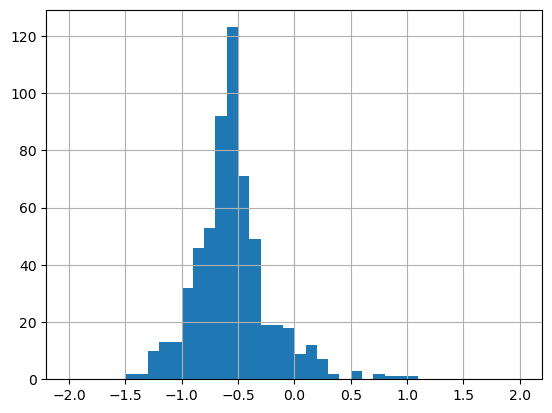

<IPython.core.display.Javascript object>

In [27]:
tr0 = (
    temperatures
    .filter(
        scenario="flat10_cdr",
        year=range(start_year + 310 - 10, start_year + 310 + 9 + 1),
    )
    .timeseries(time_axis="year")
    .mean(axis="columns")
)

tr0.name = "TR0_flat10"
tr0.hist(bins=np.arange(-2, 2.1, 0.1))

## tPW

<Axes: >

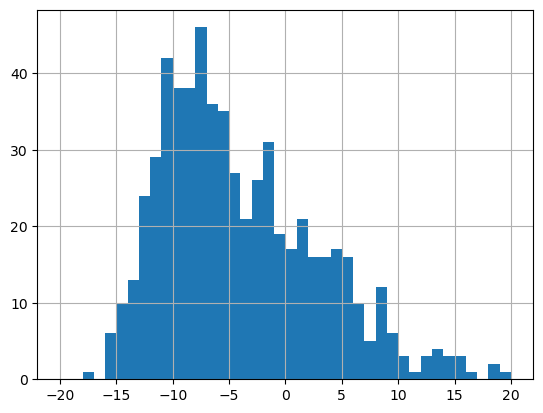

<IPython.core.display.Javascript object>

In [28]:
FLAT10_CDR_NET_ZERO_YEAR = start_year + 150

tPw = (
    temperatures
    .filter(
        scenario="flat10_cdr",
    )
    .timeseries(time_axis="year")
    .idxmax(axis="columns")
) - FLAT10_CDR_NET_ZERO_YEAR
tPw.name = "tPW"
tPw.hist(bins=np.arange(-20, 21, 1))

## Joint plot

In [29]:
jpdf = pd.concat(
    [
        s.reset_index("scenario", drop=True)
        for s in [
            tcre_flat10,
            zec_flat10,
            tnz,
            tr1000,
            tr0,
            tPw,
        ]
    ], 
    axis="columns",
)
jpdf

TCRE_flat10  \
climate_model ensemble_member model     region unit variable                                      
MAGICCv7.5.3  0               idealised World  K    Surface Air Temperature Change     1.831847   
              1               idealised World  K    Surface Air Temperature Change     3.634616   
              10              idealised World  K    Surface Air Temperature Change     1.927942   
              100             idealised World  K    Surface Air Temperature Change     1.174465   
              101             idealised World  K    Surface Air Temperature Change     1.366835   
...                                                                                         ...   
              95              idealised World  K    Surface Air Temperature Change     1.297439   
              96              idealised World  K    Surface Air Temperature Change     1.337642   
              97              idealised World  K    Surface Air Temperature Change     1.554254   
              98              idealised World  K    Surface Air Temperature Change     1.492252   
              99              idealised World  K    Surface Air Temperature Change     1.016173   

                                                                                    ZEC50_flat10  \
climate_model ensemble_member model     region unit variable                                       
MAGICCv7.5.3  0               idealised World  K    Surface Air Temperature Change     -0.055070   
              1               idealised World  K    Surface Air Temperature Change      0.480832   
              10              idealised World  K    Surface Air Temperature Change     -0.134819   
              100             idealised World  K    Surface Air Temperature Change     -0.033854   
              101             idealised World  K    Surface Air Temperature Change     -0.122979   
...                                                                                          ...   
              95              idealised World  K    Surface Air Temperature Change     -0.186408   
              96              idealised World  K    Surface Air Temperature Change     -0.107948   
              97              idealised World  K    Surface Air Temperature Change     -0.106468   
              98              idealised World  K    Surface Air Temperature Change     -0.110825   
              99              idealised World  K    Surface Air Temperature Change      0.002144   

                                                                                    ZEC100_flat10  \
climate_model ensemble_member model     region unit variable                                        
MAGICCv7.5.3  0               idealised World  K    Surface Air Temperature Change      -0.068159   
              1               idealised World  K    Surface Air Temperature Change       0.552105   
              10              idealised World  K    Surface Air Temperature Change      -0.260349   
              100             idealised World  K    Surface Air Temperature Change      -0.069163   
              101             idealised World  K    Surface Air Temperature Change      -0.172242   
...                                                                                           ...   
              95              idealised World  K    Surface Air Temperature Change      -0.250674   
              96              idealised World  K    Surface Air Temperature Change      -0.134690   
              97              idealised World  K    Surface Air Temperature Change      -0.140437   
              98              idealised World  K    Surface Air Temperature Change      -0.161108   
              99              idealised World  K    Surface Air Temperature Change      -0.017678   

                                                                                    ZEC200_flat10  \
climate_model ensemble_member model     region unit variable                    

<IPython.core.display.Javascript object>

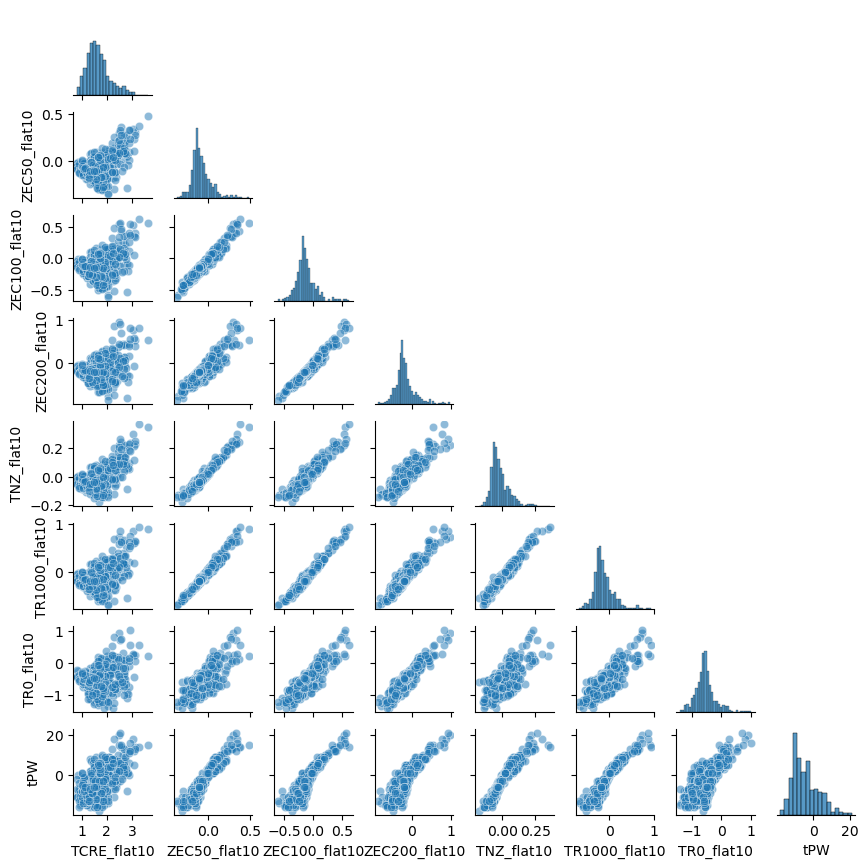

<IPython.core.display.Javascript object>

In [30]:
metrics = jpdf.columns

sns.pairplot(
    data=jpdf.reset_index(),
    vars=metrics,
    corner=True,
    plot_kws={"alpha": 0.5},
    height=1.1,
)